<a href="https://colab.research.google.com/github/Sera91/numerical-analysis-2021-2022/blob/main/Final_project_2021_2022_DiGioia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import scipy 
import scipy.linalg
import pandas as pd

Consider the following one-dimensional PDE:
$$
-u_{xx}(x) = f(x)\quad\mathrm{ in }\ \Omega = (0, \pi)
$$
$$
u(x) = 0, \quad\mathrm{ on }\ \partial\Omega = \{0, \pi\}
$$

Given the following $4^{th}$ order finite difference approximation of the second order derivative:

$$u_{xx}(x_i) = \frac{-u_{i-2}+16u_{i-1}-30u_i+16u_{i+1}-u_{i+2}}{12h^2}$$

Implement a function that given the domain interval, the forcing function, the number of discretization points, the boundary conditions, returns the matrix $A$ and the the right hand side $b$.

In [3]:
def finDif(omega,f,n,bc):
    assert n>1
    assert omega[1]>omega[0]
    h   = (omega[1] - omega[0]) / (n-1)
    #print("h", h)
    ood = ones((n-2,))     #off-off diagonal elements
    od  = -16*ones((n-1,)) #off-diagonal terms
    d   = 30*ones((n,))    #diagonal terms 
    A   = (diag(ood,-2) + diag(od,-1) + diag(d,0) + diag(od,+1) + diag(ood,+2))/(12.0*pow(h,2))

    #print(A)

    x= linspace(omega[0],omega[1],n)
    b= f(x)  #forcing term on the right-hand side

    #APPLYING BOUNDARY CONDITIONS    
    # Change first row/column of the matrix A
    A[0,:] = 0
    A[:,0] = 0

    # Change last row/column of the matrix A
    A[-1,:] = 0
    A[:,-1] = 0
     

    A[0,0] = A[-1,-1] = 1

    #Change first term of b
    b[0] = bc[0]

    
    #Change last term of b
    b[-1] = bc[1]


  
    
    
    return A, b

Call the function using:

In [ ]:
omega = [0,pi]
f = lambda x : sin(x)
n=100
bc = [0,0]
A, b = finDif(omega,f, n, bc)
#print(A)



Implement two functions that compute the LU and the Cholesky factorization of the system matrix $A$

In [ ]:
def LU(A):
    A = A.copy()
    N=len(A)
    for k in range(N-1):
        if (abs(A[k,k]) < 1e-15):
            raise RuntimeError("Null pivot")
            
        A[k+1:N,k] /= A[k,k]
        for j in range(k+1,N):
            A[k+1:N,j] -= A[k+1:N,k]*A[k,j]
    
    L=tril(A)
    for i in range(N):
        L[i,i]=1.0
    U = triu(A)
    return L, U


L, U = LU(A)
#print(L)


Cholesky decomposition

For symmetric and positive defined matrices, the Cholesky decomposition may be preferred respect to the since it reduces the number of flops for computing the LU decomposition by a factor of 2.

The Cholesky decomposition seeks an upper triangular matrix H (with all positive elements on the diagonal) such that
A=HTH

An implementation of the Cholesky decomposition is provided in the following function. We can use it to solve the linear system by forward and backward substitution.

In [ ]:
#scipy.linalg.cholesky(A)

def cholesky(A):
    A = A.copy()
    #print(A)
    N = len(A)
    for k in range(N-1):
        A[k,k] = sqrt(A[k,k])
        A[k+1:N,k] = A[k+1:N,k]/A[k,k]
        
        for j in range(k+1,N):
            A[j:N,j] = A[j:N,j] - (A[j:N,k]*A[j,k])
            
    A[-1,-1] = sqrt(A[-1,-1])
    L=tril(A)
    return L, L.transpose()

HT, H = cholesky(A)

Implement forward and backward substitution functions to exploit the developed factorization methods to solve the derived linear system of equations.

In [ ]:
def L_solve(L,rhs):
    x = zeros_like(rhs)
    N = len(L)
        
    x[0] = rhs[0]/L[0,0]
    for i in range(1,N):
        x[i] = (rhs[i] - dot(L[i, 0:i], x[0:i]))/L[i,i] 
    return x

In [ ]:
def U_solve(U,rhs):
    x = zeros_like(rhs)
    N = len(U)
        
    x[-1] = rhs[-1]/U[-1,-1]
    
    for i in reversed(range(N-1)):
        x[i] = (rhs[i] - dot(U[i, (i+1):N], x[(i+1):N]))/U[i,i]
    
    return x

Solve the derived linear system using the implemented functions and plot the computed solution:

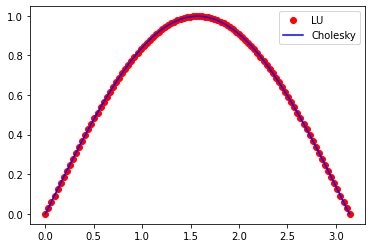

In [ ]:

y_LU = L_solve(L,b)
u_LU = U_solve(U,y_LU)

y_CH = L_solve(HT,b)
u_CH = U_solve(H,y_CH)

x=linspace(0,pi,n)
_ = plt.plot(x,u_LU,'ro', label='LU' )
_ = plt.plot(x,u_CH,'b', label='Cholesky')
plt.legend(loc='best')

Considering the new domain $\Omega = (0,1)$ and the forcing term $f(x) = x(1-x)$ with B.C. $u(x) = 0$, on $\partial \Omega = {0,1}$ produce a plot and a table where you show the decay of the error w.r.t. the number of grid points.
(The analytical solution for the above problems is $u_{an} = \frac{x^4}{12} - \frac{x^3}{6} + \frac{x}{12}$)

      N     error
0    10  0.001936
1    20  0.001419
2    30  0.001167
3    40  0.001013
4    50  0.000908
5    60  0.000829
6    70  0.000768
7    80  0.000719
8    90  0.000678
9   100  0.000643
10  110  0.000614
11  120  0.000588
12  130  0.000565
13  140  0.000544
14  150  0.000526
15  160  0.000509
16  170  0.000494
17  180  0.000480
18  190  0.000467
19  200  0.000455
20  210  0.000444
21  220  0.000434
22  230  0.000425
23  240  0.000416
24  250  0.000407
25  260  0.000400
26  270  0.000392
27  280  0.000385
28  290  0.000378
29  300  0.000372
30  310  0.000366
31  320  0.000360
32  330  0.000355
33  340  0.000349
34  350  0.000344
35  360  0.000340
36  370  0.000335
37  380  0.000331
38  390  0.000326
39  400  0.000322
40  410  0.000318
41  420  0.000314
42  430  0.000311
43  440  0.000307
44  450  0.000304
45  460  0.000300
46  470  0.000297
47  480  0.000294
48  490  0.000291
49  500  0.000288


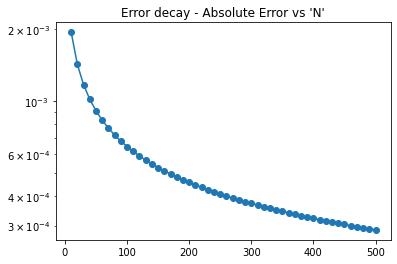

In [ ]:
omega_new = [0,1]
f_new = lambda x : x*(1-x)

bc_new = [0,0]


fsol_an= lambda x : (pow(x,4)/12 - pow(x,3)/6 + x/12)

error_approx=[]

n_range = np.arange(10,501,10)

for i,n_val in enumerate(n_range):
  x=linspace(0,1,n_val)
  A_new, b_new = finDif(omega_new, f_new, n_val, bc)
  HT_new, H_new = cholesky(A_new)
  y_new = L_solve(HT_new,b_new)
  u_app = U_solve(H_new,y_new)
  u_an = fsol_an(x)
  error_approx.append(np.linalg.norm(np.abs(u_an - u_app), 2))

#TABLE
df = pd.DataFrame({'N' : n_range, 'error' : error_approx})  
print(df)

#PLOT
plt.title("Error decay - Absolute Error vs 'N'")
_ = plt.semilogy(n_range, error_approx, 'o-')

Exploit the derived LU factorizations to compute the condition number of the system's matrix $A$ using the original problem formulation.

In [ ]:
# Power Method Function 
def Power_Method(A,z0,tol,nmax):
    q = z0/(linalg.norm(z0,2))
    it = 0
    err = tol + 1.
    
    while it < nmax and err > tol:
        z = dot(A,q)
        l = dot(q.T,z)
        err = linalg.norm(z-l*q,2)
        q = z/linalg.norm(z,2)
        it += 1
    
    return l,q


In [ ]:
# Inverse Power Method Function 
def I_Power_Method(A,x0,mu,tol,nmax):
    I = eye(len(A))
    M = A - mu*I
    L,U = LU(M)
    q = x0/linalg.norm(x0,2)
    err = tol + 1.0
    it = 0
    
    while it < nmax and err > tol:
        y = L_solve(L,q)
        x = U_solve(U,y)
        q = x/linalg.norm(x,2)
        z = dot(A,q)
        l = dot(q.T,z)
        err = linalg.norm(z-l*q,2)
        it += 1
    return l,q 

In [ ]:
#CONDITION NUMBER 
def condNumb(A):
    z0 = random.rand(A.shape[0])
    mu = 0.0
    tol = 1.e-6
    nmax = 10000
    lmax = Power_Method(A,z0,tol,nmax)[0]
    #print(lmax)
    lmin = I_Power_Method(A,z0,mu,tol,nmax)[0]
    condNu = lmax/lmin
    
    return condNu

print(condNumb(A))
print(linalg.cond(A))

5294.598014455871
5294.598016140671


Implement a preconditioned Conjugant Gradient method to solve the original linear system of equations using an iterative method:

Precision achieved. Iterations: 50
Difference between the PCG sol and the previous sol:
7.144872527823964e-14
Difference between the PCG sol and the exact sol:
6.551409247055097e-14


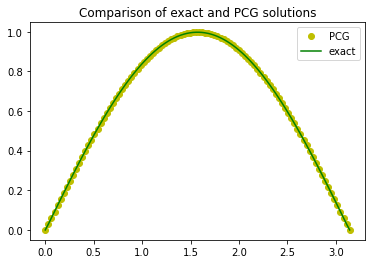

In [ ]:
def PCG(A, b, P, nmax=len(A), eps=1e-10):
 
    tol = eps + 0.1
    iter = 0
    x = zeros_like(b)
    residual = b - dot(A,x)
    rho_old = 1.
    p_old = zeros_like(b)
    while (iter < nmax and tol > eps):
        iter += 1
        z = linalg.solve(P,residual)
        rho = dot(residual,z)
        if (iter > 1):
            beta = rho/rho_old
            p = z + beta*p_old
        else:
            p = z
        q = dot(A,p)
        alpha = rho/(dot(p,q))
        x += p*alpha
        residual -= q*alpha
        p_old = p
        rho_old = rho
        tol = linalg.norm(residual,2)  

    if iter <nmax:
        print('Precision achieved. Iterations:', iter)
    else:
        print('Convergence failed.')

    return x



x=linspace(omega[0],omega[1],n)
sol_conjugate_gradient = PCG(A,b,identity(len(A)))

# Old solution
w = L_solve(L,b)
u = U_solve(U,w)

# Scipy solution

u_ex = scipy.linalg.solve(A, b)
# plot
plt.title('Comparison of exact and PCG solutions')
_ = plt.plot(x,sol_conjugate_gradient,'yo', label='PCG')
_ = plt.plot(x,u_ex,'g', label='exact')
plt.legend(loc='best')

print("Difference between the PCG sol and the previous sol:")
print(linalg.norm(sol_conjugate_gradient - u)/linalg.norm(u))

print("Difference between the PCG sol and the exact sol:")
print(linalg.norm(sol_conjugate_gradient-u_ex)/linalg.norm(u_ex))


Consider the following time dependent variation of the PDE starting from the orginal problem formulation:
$$
u'(t)-u_{xx} = \alpha(t)f(x)
$$

for $t\in [0,T]$, with $\alpha(t) = \cos(t)$ and $T = 6\pi$

Use the same finite difference scheme to derive the semi-discrete formulation and solve it using a forward Euler's method.

Plot the time dependent solution solution at $x = \pi/2$, $x=1$, 
$x=\pi$


f(t+1,x) = f(t,x) + h*Au + alpha*f



First, we discretize the time using the Forward Euler approximation for the first derivative with respect to $t$ : 
$$ \frac{∂ u}{∂ t} (x, t) \sim  \frac{u(x, t_{n+1} ) - u (x, t_n)}{h_t}$$
This allows us to rewrite the time-dependent solution of the PDE as:
$$ u(x, t_{n+1} ) = u (x, t_n) + h_t u_{xx} (x, t_n) + h_t \alpha (t_n) f (x) $$

Then, we adopt the finite difference scheme used in the first point for the spatial derivative:
$$u_{xx}(x_i,t) = \frac{-u(x_{i-2},t)+16u(x_{i-1}, t)-30u(x_i, t)+16u(x_{i+1}, t) -u (x_{i+2}, t)}{12h_x^2}$$
and substituting this in the previous expression, we obtain

$$ u(x_i, t_{n+1} ) = u (x_i, t_n) + h_t  \frac{-u(x_{i-2},t)+16u(x_{i-1}, t)-30u(x_i, t)+16u(x_{i+1}, t) -u (x_{i+2}, t)}{12h_x^2} + h_t \alpha (t_n) f (x_i) $$

that can be rewritten in a more useful form as:
$$ u(x_i, t_{n+1} ) =   h_t  \frac{-u(x_{i-2},t)+16u(x_{i-1}, t)+(-30 + 12 h_x^2/h_t) u(x_i, t)+16u(x_{i+1}, t) -u (x_{i+2}, t)}{12h_x^2} + h_t \alpha (t_n) f (x_i) $$ .

Initial condition: y(0)=0
Initial condition: y(0)=sin(x)


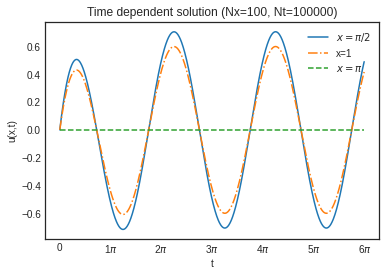

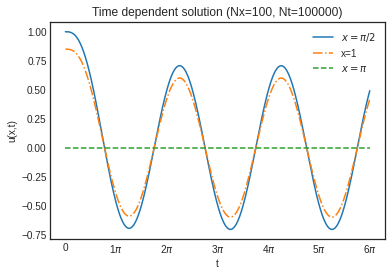

In [9]:


def Forward_Euler(u0, f, alpha, Omega_x, Omega_t, Nx, Nt):
    if not isinstance(u0, ndarray):
        u0 = repeat(u0, Nx)
    
    ht = (Omega_t[1] - Omega_t[0]) / (Nt-1)
    hx = (Omega_x[1] - Omega_x[0]) / (Nx-1)
    
    xs = linspace(Omega_x[0],Omega_x[1], Nx)
    ts = linspace(Omega_t[0],Omega_t[1], Nt)

    #A = zeros((Nx,Nx), dtype=float)
 
    ood = -1.0*ones((Nx-2,))
    od  = 16*ones((Nx-1,))
    d   = (-30 + 12.0*pow(hx,2)/ht)*ones((Nx,))
    A   = (diag(ood,-2) + diag(od,-1) + diag(d,0) + diag(od,+1) + diag(ood,+2))
    A   = ht*A/(12.0*pow(hx,2))
    A[0,:]= 0
    A[-1,:]=0
    
    f = vectorize(f)(xs)
    
    u = zeros((Nx, Nt), dtype=float)
    u[:,0] = u0
    
    # boundary conditions
    u[[0,-1],0] = 0
    f[[0,-1]] = 0
    
    for i in range(1,Nt):
        u[:,i] = A.dot(u[:,i-1]) + ht * alpha(i*ht) * f
        
    return xs,ts,u




alpha_function = lambda x: cos(x)
f = lambda x: sin(x)

x_50, t_50, u_50 = Forward_Euler(0, f, alpha_function, (0,pi), (0,6*pi), Nx=50, Nt=100000)
x_1000, t_1000, u_1000 = Forward_Euler(0, f, alpha_function, (0,pi), (0,6*pi), Nx=1000, Nt=100000)



#time dependent solution solution at x=π/2, x=1, x=π

def plot_xfixed_solution(xs,ts,u,Nx,Nt):

    pi_2_idx = argmin(abs(xs - pi/2))
    one_idx = argmin(abs(xs - 1))
    pi_idx = -1
    
    approx_pi2 = round(xs[pi_2_idx],4)
    approx_one = round(xs[one_idx],4)
    approx_pi = round(xs[pi_idx], 4)

    time_slice = slice(None,None,100)

    
    plt.plot(ts[time_slice], u[pi_2_idx,time_slice], '-', label=r'$x=\pi/2$' )
    plt.plot(ts[time_slice], u[one_idx,time_slice], '-.', label='x=1')
    plt.plot(ts[time_slice], u[pi_idx,time_slice], '--', label=r'$x=\pi$')

    plt.xticks([i*pi for i in range(7)], ['0', *('{}$\\pi$'.format(i) for i in range(1,7))])

    plt.xlabel('t')
    plt.ylabel('u(x,t)')

    plt.title('Time dependent solution (Nx={}, Nt={})'.format(Nx,Nt))
    plt.legend(loc='best')
    
print("Initial condition: y(0)=0")
x_100, t_100, u_100 = Forward_Euler(0, f, alpha_function, (0,pi), (0,6*pi), Nx=100, Nt=100000)
plt.figure(1)
plot_xfixed_solution(x_100, t_100, u_100, 100, 100000)

print("Initial condition: y(0)=sin(x)")

N_x=100
x=linspace(0,pi,N_x)

x_100, t_100, u_100 = Forward_Euler(sin(x), f, alpha_function, (0,pi), (0,6*pi), Nx=N_x, Nt=100000)

plt.figure(2)
plot_xfixed_solution(x_100, t_100, u_100, 100, 100000)

Given the original $Au = b$ system, implement an algorithm to compute the eigenvalues and eigenvectors of the matrix $A$. Exploit the computed LU factorization

In [ ]:
def eigenvalues_LU(A,tol,Nmax_iterations=2000):
    B = A.copy()
    eigval_old = diag(B)
    err = tol+1.0
    it = 0
    
    while it < Nmax_iterations and err > tol:
        L,U = LU(B)
        #B = U@L
        B = matmul(U,L)
        eigval_new = diag(B)  
        err = linalg.norm(eigval_new - eigval_old,2)
        it += 1
        eigval_old = eigval_new
        
    return eigval_new

def eigenvectors_LU(A,tol,nmax):
    """
    this function estimates the eigenvectors of the matrix A
    using the Inverse Power Method with shift, and exploiting 
    the LU decomposition of A for the estimation of the eigenvalues.
    """

    eigvecs = zeros_like(A)
    n=A.shape[0]
    q = np.random.rand(n)
    new_eigvals=zeros_like(n)
    eigvals = eigenvalues_LU(A,tol,1000)
    for i in range(len(eigvals)):
        eigval_val, eigvec_val = I_Power_Method(A,q,eigvals[i]+tol,tol,nmax)
        new_eigvals[i] = eigval_val
        eigvecs[i,:] = eigvec_val
         
    return new_eigvals, eigvecs

nmax = 10000
tol = 1e-10
eigenvalues=eigenvalues_LU(A,tol,1000)
new_eigenvalues, eigenvectors = eigenvectors_LU(A,tol,nmax)

eigenvalues_numpy,eigenvectors_numpy = linalg.eig(A)

diff_lambda= sort(eigenvalues)-sort(eigenvalues_numpy)

print(diff_lambda)

print('max discrepancy lambda:', np.max(diff_lambda))

KeyboardInterrupt: ignored

In [ ]:
def lueig(A,iterations=1000):
    n = A.shape[0]
    eigvals = np.zeros(n)
    L, U = LU(A)
    it = 0
    new_A = ones_like(A)
    while(it<iterations):
        new_A = U@L
        L, U = LU(new_A)
        it = it+1
    eigvals = np.diag(new_A) 
    return eigvals

def eig(A,eps=1e-10):
    n = A.shape[0]
    x=linspace(0,1,n)
    z0 = ones_like(x)
    eigvals = np.zeros(n)
    eigvecs = np.zeros((n,n))
    lueigvals = lueig(A)
    for i, qre in enumerate(lueigvals):
        eigvals[i], eigvecs[:,i] = I_Power_Method(A,z0,qre+eps,1e-10,10000 )
    return eigvals, eigvecs

l,v = eig(A)
l_numpy,v_numpy = linalg.eig(A)
print(sort(l)-sort(l_numpy))
print(sort(v)-sort(v_numpy))


[ 2.22044605e-16  2.22044605e-16  8.76410056e-13  7.14983628e-13
  4.44089210e-14  3.05533376e-13 -3.55271368e-14 -1.35003120e-13
  1.15818466e-12  5.11590770e-13  1.70530257e-13  4.97379915e-13
 -3.12638804e-13  2.84217094e-14 -8.52651283e-13  7.67386155e-13
  0.00000000e+00  1.19371180e-12  1.02318154e-12  6.25277607e-13
 -7.38964445e-13 -1.13686838e-13 -9.66338121e-13 -1.70530257e-13
 -5.68434189e-13 -3.41060513e-13  1.81898940e-12  5.68434189e-13
 -1.13686838e-13  7.95807864e-13 -9.09494702e-13  1.36424205e-12
 -2.04636308e-12  1.13686838e-12  5.68434189e-12  4.09272616e-12
 -9.09494702e-13 -2.27373675e-13 -2.27373675e-13 -1.36424205e-12
 -1.36424205e-12  1.02318154e-11 -8.86757334e-12 -4.09272616e-12
 -9.09494702e-13 -4.32009983e-12 -3.63797881e-12 -2.27373675e-13
 -4.09272616e-12 -1.22781785e-11 -5.91171556e-12 -3.63797881e-12
 -4.54747351e-12  2.72848411e-12 -2.27373675e-12  1.81898940e-12
  2.72848411e-12  9.09494702e-13  8.64019967e-12  1.04591891e-11
  8.18545232e-12  1.40971

Compute the inverse of the matrix A exploiting the derived LU factorization

In [ ]:
from scipy.linalg import solve

I = identity(n)
Y= solve(L,I,lower=True)
A_inv_LU = solve(U,Y)




A_inv_numpy = linalg.inv(A)

print("Max error between the 2 matrices = ")
print(max(np.abs(A_inv_LU - A_inv_numpy).max(axis=0)))


#print(A_inverse)


Max error between the 2 matrices = 
2.813721478034381e-15


Consider the following Cauchy problem
$$
\begin{cases}
y'= -ty^2 \quad 0\le t \le 2\\
y(0) = 1
\end{cases}
$$
Implement a Backward Euler's method in a suitable function and solve the resulting non-linear equation using a Newton's method.

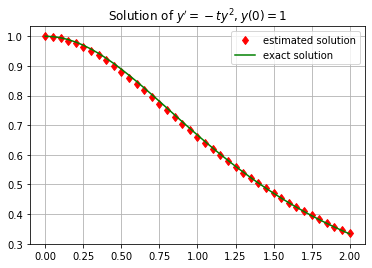

In [ ]:
# Newton's Method function
def Newton(f,f_prime,x0,eps,nmax):
    assert abs(f_prime(x0)) > 1e-16
    err = abs(f(x0))
    errors = [err]
    it = 0
    x = x0
    
    while (err > eps and it < nmax):
        qk = f_prime(x)
        if abs(qk) < 1e-12:
            raise RuntimeError("f_prime(x) is close to zero")
        
        x_new = x - f(x)/qk 
        err = abs(f(x_new))
        
        x = x_new
        errors.append(err)
        it += 1
            
        #plt.semilogy(errors)

    return x, errors

# Backward Euler Method Function
def B_Euler(y0,t0,tf,h):
    timesteps = arange(t0, tf+1e-10, h)
    t = timesteps
    sol = zeros_like(timesteps)
    sol[0] = y0
    eps = 1e-5
    n_max = 1000
    
    for i in range(1, len(sol)):
        f = lambda y: t[i]*h*y**2 + y - sol[i-1]
        df = lambda y: 2*t[i]*h*y + 1
        sol[i],_ = Newton(f, df, sol[i-1], eps, n_max)

    return sol, timesteps

# Plot solution of Cauchy Problem

t_0 = 0.0
t_f = 2.0
y0 = 1.0

y,t = B_Euler(y0, t_0, t_f, 0.05)
y_ex = 2.0/(t*t + 2.0)

plt.title("Solution of $y'=-ty^2 , y(0)=1$" )
plt.grid(True)
plt.plot(t, y, 'rd', label='estimated solution')
plt.plot(t, y_ex, 'g-', label='exact solution')
plt.legend()